In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.tsa as sm1
from pandas.tools.plotting import autocorrelation_plot
from scipy import stats
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_process import arma_generate_sample

from datetime import datetime
from sklearn.cross_validation import train_test_split,StratifiedKFold,KFold,cross_val_score
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, classification_report,r2_score
from scipy import interp
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
from __future__ import division

In [5]:
sales=pd.read_excel('filter_for_final_ts.xlsx',index='Date')

In [6]:
sales.shape

(6435, 12)

In [7]:
sales.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,6,2012-10-21,72.34,3.506,6827.59,53.07,NaN,319.25,1881.27,225.068625,5.329,1431426.34
1,2,2012-10-21,69.79,3.506,6152.59,129.77,200.00,272.29,2924.15,223.078337,6.170,1834458.35
2,11,2012-10-21,74.26,3.506,4115.64,147.27,153.00,1060.90,3936.20,226.987364,6.034,1200729.45
3,14,2012-10-21,58.85,3.882,9258.41,99.19,117.84,1489.28,1433.31,192.308899,8.667,1704357.62
4,5,2012-10-21,71.70,3.506,1547.61,1.74,NaN,133.31,598.74,224.037814,5.422,319550.77


In [4]:
sales.shape

(6435, 12)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 12 columns):
Store           6435 non-null int64
Date            6435 non-null datetime64[ns]
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
MarkDown1       2280 non-null float64
MarkDown2       1637 non-null float64
MarkDown3       2046 non-null float64
MarkDown4       1965 non-null float64
MarkDown5       2295 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
Weekly_Sales    6435 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 653.6 KB


In [6]:
sales.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
Weekly_Sales       0
dtype: int64

In [7]:
sales.fillna(value=0,axis=1,inplace=True)

In [8]:
sales["Date"] = (pd.to_datetime(sales["Date"], format="%d-%m-%Y"))

In [9]:
sales['Day_of_Month']=sales["Date"].apply(lambda x: x.day)

In [10]:
sales['Month']=sales["Date"].apply(lambda x: x.month)

In [11]:
sales['DayOfYear']=sales["Date"].apply(lambda x: x.dayofyear)

In [12]:
sales['WeekOfYear']=sales["Date"].apply(lambda x: x.weekofyear)

In [13]:
sales['Quarter']=sales["Date"].apply(lambda x: x.quarter)

In [14]:
sales['WeekDay']=sales["Date"].apply(lambda x: x.weekday())

In [15]:
sales['DayCount']=sales["Date"].apply(lambda x: x.toordinal())

In [16]:
sales.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,Day_of_Month,Month,DayOfYear,WeekOfYear,Quarter,WeekDay,DayCount
0,6,2012-10-21,72.34,3.506,6827.59,53.07,0.00,319.25,1881.27,225.068625,5.329,1431426.34,21,10,295,42,4,6,734797
1,2,2012-10-21,69.79,3.506,6152.59,129.77,200.00,272.29,2924.15,223.078337,6.170,1834458.35,21,10,295,42,4,6,734797
2,11,2012-10-21,74.26,3.506,4115.64,147.27,153.00,1060.90,3936.20,226.987364,6.034,1200729.45,21,10,295,42,4,6,734797
3,14,2012-10-21,58.85,3.882,9258.41,99.19,117.84,1489.28,1433.31,192.308899,8.667,1704357.62,21,10,295,42,4,6,734797
4,5,2012-10-21,71.70,3.506,1547.61,1.74,0.00,133.31,598.74,224.037814,5.422,319550.77,21,10,295,42,4,6,734797


In [17]:
sales.sort(columns=['Store','Date'],inplace=True)

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [18]:
sales.Date.apply(lambda x:x-pd.DateOffset(weeks=53)).head()

6429   2009-01-25
6359   2009-02-01
6331   2009-02-08
6279   2009-02-15
6219   2009-02-22
Name: Date, dtype: datetime64[ns]

In [19]:
sales.Date.head()

6429   2010-01-31
6359   2010-02-07
6331   2010-02-14
6279   2010-02-21
6219   2010-02-28
Name: Date, dtype: datetime64[ns]

In [20]:
sales.columns

Index([       u'Store',         u'Date',  u'Temperature',   u'Fuel_Price',
          u'MarkDown1',    u'MarkDown2',    u'MarkDown3',    u'MarkDown4',
          u'MarkDown5',          u'CPI', u'Unemployment', u'Weekly_Sales',
       u'Day_of_Month',        u'Month',    u'DayOfYear',   u'WeekOfYear',
            u'Quarter',      u'WeekDay',     u'DayCount'],
      dtype='object')

In [21]:
sales.ix[(sales.Date=='2011-10-16')&(sales.Store==6),:]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,Day_of_Month,Month,DayOfYear,WeekOfYear,Quarter,WeekDay,DayCount
2419,6,2011-10-16,68.53,3.353,0,0,0,0,0,219.074017,6.551,1417922.37,16,10,289,41,4,6,734426


In [22]:
store=sales[sales.Store==1]
store['Date'] =pd.to_datetime(store.Date)
store.set_index('Date',inplace=True)
store['Weekly_Sales_prev_yr']=store['Weekly_Sales'].shift(53)
store.reset_index(inplace=True)
x=pd.concat((sales,store),join='inner',axis=1)['Weekly_Sales_prev_yr']

for i in range(2,145):
    store=sales[sales.Store==i]
    store['Date'] =pd.to_datetime(store.Date)
    store.set_index('Date',inplace=True)
    store['Weekly_Sales_prev_yr']=store['Weekly_Sales'].shift(53)
    store.reset_index(inplace=True)
    x=x.append(pd.concat((sales,store),join='inner',axis=1)['Weekly_Sales_prev_yr'])

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [23]:
store=sales[sales.Store==1]
store['Date'] =pd.to_datetime(store.Date)
store.set_index('Date',inplace=True)
store['Weekly_Sales_prev_yr_1']=store['Weekly_Sales'].shift(52)
store.reset_index(inplace=True)
x1=pd.concat((sales,store),join='inner',axis=1)['Weekly_Sales_prev_yr_1']

for i in range(2,145):
    store=sales[sales.Store==i]
    store['Date'] =pd.to_datetime(store.Date)
    store.set_index('Date',inplace=True)
    store['Weekly_Sales_prev_yr_1']=store['Weekly_Sales'].shift(51)
    store.reset_index(inplace=True)
    x1=x1.append(pd.concat((sales,store),join='inner',axis=1)['Weekly_Sales_prev_yr_1'])

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [24]:
store=sales[sales.Store==1]
store['Date'] =pd.to_datetime(store.Date)
store.set_index('Date',inplace=True)
store['Weekly_Sales_prev_week']=store['Weekly_Sales'].shift(1)
store.reset_index(inplace=True)
x2=pd.concat((sales,store),join='inner',axis=1)['Weekly_Sales_prev_week']

for i in range(2,145):
    store=sales[sales.Store==i]
    store['Date'] =pd.to_datetime(store.Date)
    store.set_index('Date',inplace=True)
    store['Weekly_Sales_prev_week']=store['Weekly_Sales'].shift(1)
    store.reset_index(inplace=True)
    x2=x2.append(pd.concat((sales,store),join='inner',axis=1)['Weekly_Sales_prev_week'])

C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\raviteja\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [25]:
sales.reset_index(inplace=True)

In [26]:
sales.head()

,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,Day_of_Month,Month,DayOfYear,WeekOfYear,Quarter,WeekDay,DayCount
0,6429,1,2010-01-31,42.31,2.572,0,0,0,0,0,211.096358,8.106,1643690.90,31,1,31,4,1,6,733803
1,6359,1,2010-02-07,38.51,2.548,0,0,0,0,0,211.242170,8.106,1641957.44,7,2,38,5,1,6,733810
2,6331,1,2010-02-14,39.93,2.514,0,0,0,0,0,211.289143,8.106,1611968.17,14,2,45,6,1,6,733817
3,6279,1,2010-02-21,46.63,2.561,0,0,0,0,0,211.319643,8.106,1409727.59,21,2,52,7,1,6,733824
4,6219,1,2010-02-28,46.50,2.625,0,0,0,0,0,211.350143,8.106,1554806.68,28,2,59,8,1,6,733831


In [27]:
sales.shape

(6435, 20)

In [28]:
x=x.reset_index()['Weekly_Sales_prev_yr']

In [29]:
x1=x1.reset_index()['Weekly_Sales_prev_yr_1']

In [30]:
x2=x2.reset_index()['Weekly_Sales_prev_week']

In [31]:
sales = sales.join(x)

In [32]:
sales.head()

,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,Weekly_Sales,Day_of_Month,Month,DayOfYear,WeekOfYear,Quarter,WeekDay,DayCount,Weekly_Sales_prev_yr
0,6429,1,2010-01-31,42.31,2.572,0,0,0,0,0,...,8.106,1643690.90,31,1,31,4,1,6,733803,NaN
1,6359,1,2010-02-07,38.51,2.548,0,0,0,0,0,...,8.106,1641957.44,7,2,38,5,1,6,733810,NaN
2,6331,1,2010-02-14,39.93,2.514,0,0,0,0,0,...,8.106,1611968.17,14,2,45,6,1,6,733817,NaN
3,6279,1,2010-02-21,46.63,2.561,0,0,0,0,0,...,8.106,1409727.59,21,2,52,7,1,6,733824,NaN
4,6219,1,2010-02-28,46.50,2.625,0,0,0,0,0,...,8.106,1554806.68,28,2,59,8,1,6,733831,NaN


In [33]:
sales = sales.join(x1)
sales = sales.join(x2)

In [34]:
sales.shape

(6435, 23)

In [35]:
sales.head()

,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Day_of_Month,Month,DayOfYear,WeekOfYear,Quarter,WeekDay,DayCount,Weekly_Sales_prev_yr,Weekly_Sales_prev_yr_1,Weekly_Sales_prev_week
0,6429,1,2010-01-31,42.31,2.572,0,0,0,0,0,...,31,1,31,4,1,6,733803,NaN,NaN,NaN
1,6359,1,2010-02-07,38.51,2.548,0,0,0,0,0,...,7,2,38,5,1,6,733810,NaN,NaN,1643690.90
2,6331,1,2010-02-14,39.93,2.514,0,0,0,0,0,...,14,2,45,6,1,6,733817,NaN,NaN,1641957.44
3,6279,1,2010-02-21,46.63,2.561,0,0,0,0,0,...,21,2,52,7,1,6,733824,NaN,NaN,1611968.17
4,6219,1,2010-02-28,46.50,2.625,0,0,0,0,0,...,28,2,59,8,1,6,733831,NaN,NaN,1409727.59


In [36]:
sales.Weekly_Sales_prev_yr.isnull().sum()

2385

In [37]:
sales.head()

,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Day_of_Month,Month,DayOfYear,WeekOfYear,Quarter,WeekDay,DayCount,Weekly_Sales_prev_yr,Weekly_Sales_prev_yr_1,Weekly_Sales_prev_week
0,6429,1,2010-01-31,42.31,2.572,0,0,0,0,0,...,31,1,31,4,1,6,733803,NaN,NaN,NaN
1,6359,1,2010-02-07,38.51,2.548,0,0,0,0,0,...,7,2,38,5,1,6,733810,NaN,NaN,1643690.90
2,6331,1,2010-02-14,39.93,2.514,0,0,0,0,0,...,14,2,45,6,1,6,733817,NaN,NaN,1641957.44
3,6279,1,2010-02-21,46.63,2.561,0,0,0,0,0,...,21,2,52,7,1,6,733824,NaN,NaN,1611968.17
4,6219,1,2010-02-28,46.50,2.625,0,0,0,0,0,...,28,2,59,8,1,6,733831,NaN,NaN,1409727.59


In [38]:
sales.shape

(6435, 23)

In [39]:
sales.dropna(inplace=True)

In [40]:
sales.columns

Index([                 u'index',                  u'Store',
                         u'Date',            u'Temperature',
                   u'Fuel_Price',              u'MarkDown1',
                    u'MarkDown2',              u'MarkDown3',
                    u'MarkDown4',              u'MarkDown5',
                          u'CPI',           u'Unemployment',
                 u'Weekly_Sales',           u'Day_of_Month',
                        u'Month',              u'DayOfYear',
                   u'WeekOfYear',                u'Quarter',
                      u'WeekDay',               u'DayCount',
         u'Weekly_Sales_prev_yr', u'Weekly_Sales_prev_yr_1',
       u'Weekly_Sales_prev_week'],
      dtype='object')

In [41]:
sales.head()

,index,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Day_of_Month,Month,DayOfYear,WeekOfYear,Quarter,WeekDay,DayCount,Weekly_Sales_prev_yr,Weekly_Sales_prev_yr_1,Weekly_Sales_prev_week
53,4038,1,2011-02-06,36.39,3.022,0,0,0,0,0,...,6,2,37,5,1,6,734174,1643690.90,1641957.44,1606629.58
54,3974,1,2011-02-13,57.36,3.045,0,0,0,0,0,...,13,2,44,6,1,6,734181,1641957.44,1611968.17,1649614.93
55,3919,1,2011-02-20,62.90,3.065,0,0,0,0,0,...,20,2,51,7,1,6,734188,1611968.17,1409727.59,1686842.78
56,3901,1,2011-02-27,59.58,3.288,0,0,0,0,0,...,27,2,58,8,1,6,734195,1409727.59,1554806.68,1456800.28
57,3837,1,2011-03-06,53.56,3.459,0,0,0,0,0,...,6,3,65,9,1,6,734202,1554806.68,1439541.59,1636263.41


In [42]:
sales=sales[[u'Store',u'Temperature',u'Fuel_Price',u'MarkDown1',u'MarkDown2',u'MarkDown3',u'MarkDown4',u'MarkDown5',u'CPI',
             u'Unemployment',u'Day_of_Month',u'Month',u'DayOfYear',u'WeekOfYear',u'Quarter',u'WeekDay',u'DayCount',
             u'Weekly_Sales_prev_yr',u'Weekly_Sales_prev_yr_1','Weekly_Sales_prev_week',u'Weekly_Sales']]

# Model 1: Gradient Boosting Regression

In [43]:
x=sales.drop(['Weekly_Sales'],axis=1)
y=sales.Weekly_Sales
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [44]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [45]:
params = {'n_estimators': 500, 'max_depth': 10}
clf = ensemble.GradientBoostingRegressor(**params)

In [46]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=10, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [48]:
clf.score(X_test, y_test)

0.97464859067578835

In [50]:
clf.score(X_train, y_train)

0.99999999938573314

In [51]:
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 8188958651.8432


In [52]:
sales['GBM_Pred']=clf.predict(x)

In [53]:
sales.to_csv('sales.csv')

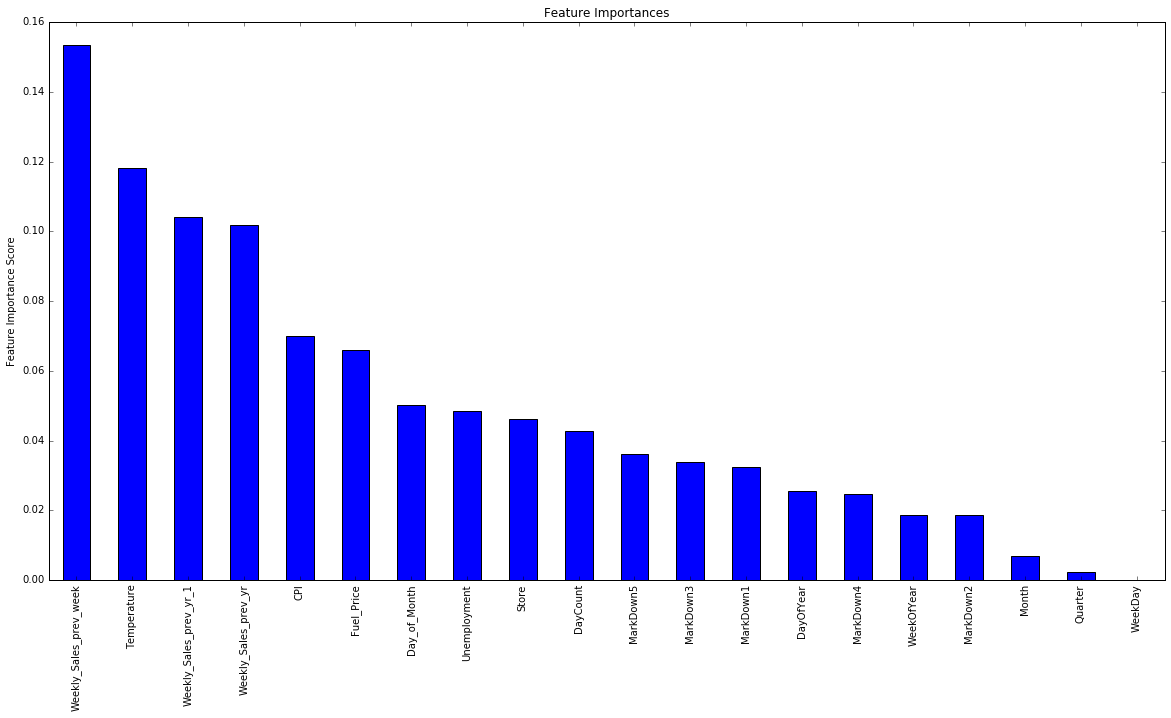

In [54]:
plt.figure(figsize=(20,10))
feat_imp = pd.Series(clf.feature_importances_, X_test.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [55]:
feat_imp.to_csv('gbm_feat_imp.csv')

In [56]:
r2_score(y,clf.predict(x))

0.9894783235125324

In [57]:
sales.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,DayOfYear,WeekOfYear,Quarter,WeekDay,DayCount,Weekly_Sales_prev_yr,Weekly_Sales_prev_yr_1,Weekly_Sales_prev_week,Weekly_Sales,GBM_Pred
53,1,36.39,3.022,0,0,0,0,0,212.936705,7.742,...,37,5,1,6,734174,1643690.90,1641957.44,1606629.58,1649614.93,1654528.137043
54,1,57.36,3.045,0,0,0,0,0,213.247885,7.742,...,44,6,1,6,734181,1641957.44,1611968.17,1649614.93,1686842.78,1686841.068834
55,1,62.90,3.065,0,0,0,0,0,213.535609,7.742,...,51,7,1,6,734188,1611968.17,1409727.59,1686842.78,1456800.28,1456798.390185
56,1,59.58,3.288,0,0,0,0,0,213.823333,7.742,...,58,8,1,6,734195,1409727.59,1554806.68,1456800.28,1636263.41,1636248.940887
57,1,53.56,3.459,0,0,0,0,0,214.111056,7.742,...,65,9,1,6,734202,1554806.68,1439541.59,1636263.41,1553191.63,1553195.428128


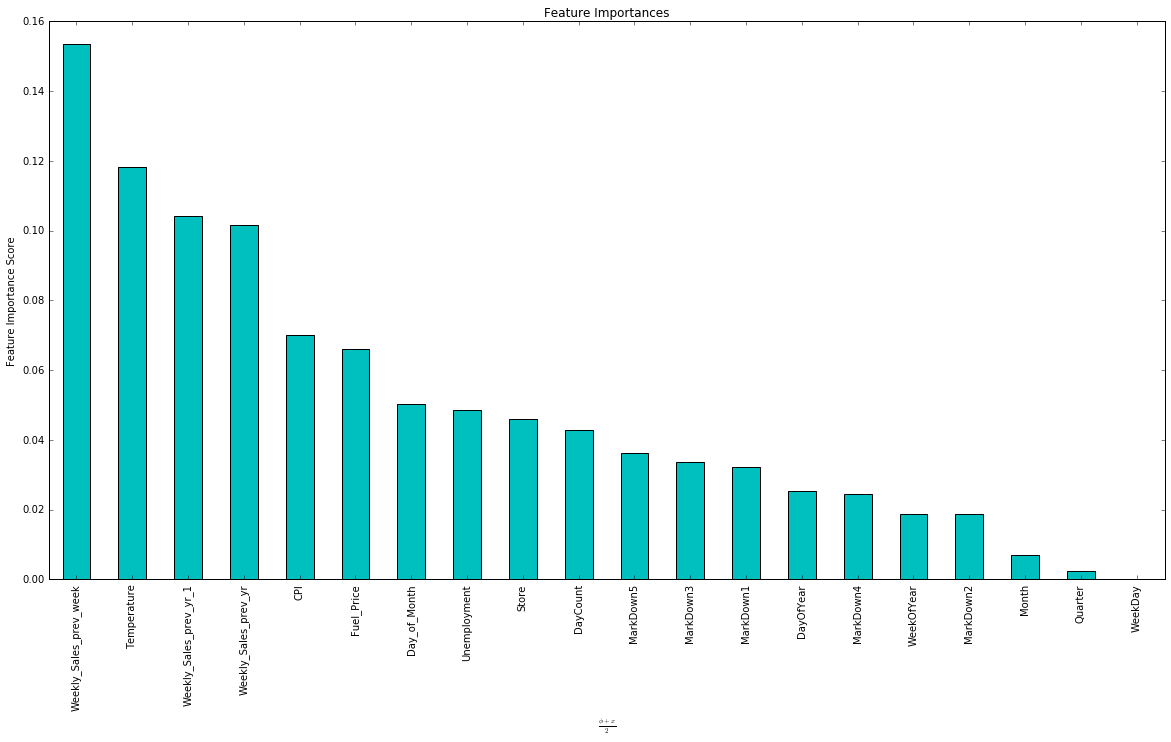

In [58]:
plt.figure(figsize=(20,10))
#feat_imp = pd.Series(clf.feature_importances_, X_test.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',color='c')
plt.ylabel('Feature Importance Score')
plt.xlabel(r'$\frac{\phi + x}{2}$')

In [59]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


In [60]:
rmse(clf.predict(x),sales['Weekly_Sales'])

57232.714174981957

In [61]:
clf.predict(x)

array([ 1654528.13704276,  1686841.06883443,  1456798.39018452, ...,
         733539.79604371,   718111.53496415,   760281.74620169])

In [62]:
sales['Weekly_Sales']

53      1649614.93
54      1686842.78
55      1456800.28
56      1636263.41
57      1553191.63
58      1576818.06
59      1541102.38
60      1495064.75
61      1614259.35
62      1559889.00
63      1564819.81
64      1455090.69
65      1629391.28
66      1604775.58
67      1428218.27
68      1466046.67
69      1635078.41
70      1588948.32
71      1532114.86
72      1438830.15
73      1488538.09
74      1534849.64
75      1455119.97
76      1396926.82
77      1352219.79
78      1624383.75
79      1525147.09
80      1530761.43
81      1464693.46
82      1550229.22
           ...    
6405     899479.43
6406     781970.60
6407     776661.74
6408     711571.88
6409     782300.68
6410     770487.37
6411     800842.28
6412     817741.17
6413     837144.63
6414     795133.00
6415     821498.18
6416     822569.16
6417     773367.71
6418     843361.10
6419     749817.08
6420     737613.65
6421     711671.58
6422     725729.51
6423     733037.32
6424     722496.93
6425     718232.26
6426     734

In [ ]:
from sklearn import preprocessing
std_scle=preprocessing.StandardScaler().fit(sales.drop(['Weekly_Sales'],axis=1))
sales_scaled=DataFrame(std_scle.transform(X=sales.drop(['Weekly_Sales'],axis=1),y=['Weekly_Sales']),
         columns=[u'Store',u'Temperature',u'Fuel_Price',u'MarkDown1',u'MarkDown2',u'MarkDown3',u'MarkDown4',u'MarkDown5',u'CPI',
             u'Unemployment',u'Day_of_Month',u'Month',u'DayOfYear',u'WeekOfYear',u'Quarter',u'WeekDay',u'DayCount',
             u'Weekly_Sales_prev_yr',u'Weekly_Sales_prev_yr_1','Weekly_Sales_prev_week'],index=sales.index)
sales_scaled.head()
sales=pd.merge(sales_scaled,sales[['Weekly_Sales']],how='inner',right_index=True,left_index=True)
pred=clf.predict(x)
pred=DataFrame(pred)

# Model 2: Linear Regression
#Not considered in the final modelling

In [223]:
sales.corr()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Month,DayOfYear,WeekOfYear,Quarter,WeekDay,DayCount,Weekly_Sales_prev_yr,Weekly_Sales_prev_yr_1,Weekly_Sales_prev_week,Weekly_Sales
Store,1.000000e+00,-0.030538,0.108294,-0.105893,-0.051850,-0.030108,-0.072277,-0.035689,-0.210007,0.225770,...,1.922738e-18,7.316176e-19,-1.118098e-18,-1.831617e-18,NaN,0.000000,-0.333690,-0.333052,-0.339852,-0.339409
Temperature,-3.053776e-02,1.000000,0.253767,-0.103340,-0.257229,-0.083964,-0.107935,-0.077821,0.188600,0.102120,...,2.359156e-01,2.382570e-01,1.868888e-01,2.381535e-01,NaN,0.177088,-0.063886,-0.058451,-0.065332,-0.063974
Fuel_Price,1.082944e-01,0.253767,1.000000,0.045301,-0.171303,-0.074137,-0.026528,-0.085493,-0.394917,0.220024,...,-3.492566e-02,-3.525485e-02,-9.048203e-02,-3.399457e-02,NaN,0.167326,0.004080,0.021306,-0.008750,-0.005062
MarkDown1,-1.058928e-01,-0.103340,0.045301,1.000000,0.145549,-0.033616,0.833968,0.355718,-0.016884,-0.063539,...,-1.320014e-01,-1.213434e-01,-1.131142e-01,-1.201904e-01,NaN,0.405565,0.214199,0.240724,0.226851,0.241222
MarkDown2,-5.185046e-02,-0.257229,-0.171303,0.145549,1.000000,-0.013279,0.091825,0.100826,-0.016299,-0.022713,...,-1.457126e-02,-1.590594e-02,1.241273e-01,-1.394165e-02,NaN,0.034739,0.235741,0.078809,0.238168,0.103213
MarkDown3,-3.010791e-02,-0.083964,-0.074137,-0.033616,-0.013279,1.000000,-0.023811,0.026370,-0.012513,-0.008358,...,1.527729e-01,1.572216e-01,1.527730e-01,1.504579e-01,NaN,-0.009935,0.056683,0.080295,0.059905,0.153734
MarkDown4,-7.227723e-02,-0.107935,-0.026528,0.833968,0.091825,-0.023811,1.000000,0.260432,-0.021939,-0.050339,...,-1.598609e-01,-1.452843e-01,-1.490993e-01,-1.332634e-01,NaN,0.238636,0.148182,0.179206,0.154290,0.181623
MarkDown5,-3.568899e-02,-0.077821,-0.085493,0.355718,0.100826,0.026370,0.260432,1.000000,0.059550,-0.088561,...,8.005976e-02,7.845717e-02,1.010899e-01,7.205234e-02,NaN,0.353137,0.235320,0.235496,0.257013,0.231674
CPI,-2.100070e-01,0.188600,-0.394917,-0.016884,-0.016299,-0.012513,-0.021939,0.059550,1.000000,-0.266223,...,9.109229e-03,9.314151e-03,1.011051e-02,9.814598e-03,NaN,0.050937,-0.075856,-0.075482,-0.068475,-0.069242
Unemployment,2.257704e-01,0.102120,0.220024,-0.063539,-0.022713,-0.008358,-0.050339,-0.088561,-0.266223,1.000000,...,-2.844488e-02,-2.894696e-02,-3.485390e-02,-3.654326e-02,NaN,-0.210088,-0.096696,-0.100060,-0.122067,-0.123456


In [224]:
import statsmodels.api as sm

In [225]:
x=sales.drop(['Weekly_Sales','Unemployment'],axis=1)
y=sales.Weekly_Sales
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [226]:
model=sm.OLS(y_train,X_train)

In [227]:
results=model.fit()

In [228]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     3357.
Date:                Wed, 30 Mar 2016   Prob (F-statistic):               0.00
Time:                        11:27:30   Log-Likelihood:                -31601.
No. Observations:                2430   AIC:                         6.324e+04
Df Residuals:                    2411   BIC:                         6.335e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Store                   -127

In [229]:
sales

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Month,DayOfYear,WeekOfYear,Quarter,WeekDay,DayCount,Weekly_Sales_prev_yr,Weekly_Sales_prev_yr_1,Weekly_Sales_prev_week,Weekly_Sales
53,1,36.39,3.022,0.00,0.00,0.00,0.00,0.00,212.936705,7.742,...,2,37,5,1,6,734174,1643690.90,1641957.44,1606629.58,1649614.93
54,1,57.36,3.045,0.00,0.00,0.00,0.00,0.00,213.247885,7.742,...,2,44,6,1,6,734181,1641957.44,1611968.17,1649614.93,1686842.78
55,1,62.90,3.065,0.00,0.00,0.00,0.00,0.00,213.535609,7.742,...,2,51,7,1,6,734188,1611968.17,1409727.59,1686842.78,1456800.28
56,1,59.58,3.288,0.00,0.00,0.00,0.00,0.00,213.823333,7.742,...,2,58,8,1,6,734195,1409727.59,1554806.68,1456800.28,1636263.41
57,1,53.56,3.459,0.00,0.00,0.00,0.00,0.00,214.111056,7.742,...,3,65,9,1,6,734202,1554806.68,1439541.59,1636263.41,1553191.63
58,1,62.76,3.488,0.00,0.00,0.00,0.00,0.00,214.362711,7.742,...,3,72,10,1,6,734209,1439541.59,1472515.79,1553191.63,1576818.06
59,1,69.97,3.473,0.00,0.00,0.00,0.00,0.00,214.599939,7.742,...,3,79,11,1,6,734216,1472515.79,1404429.92,1576818.06,1541102.38
60,1,59.17,3.524,0.00,0.00,0.00,0.00,0.00,214.837166,7.682,...,3,86,12,1,6,734223,1404429.92,1594968.28,1541102.38,1495064.75
61,1,67.84,3.622,0.00,0.00,0.00,0.00,0.00,215.074394,7.682,...,4,93,13,2,6,734230,1594968.28,1545418.53,1495064.75,1614259.35
62,1,71.27,3.743,0.00,0.00,0.00,0.00,0.00,215.291856,7.682,...,4,100,14,2,6,734237,1545418.53,1466058.28,1614259.35,1559889.00


# Model 3: Ensemble Model

In [72]:
%ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is 5CA2-A60B

 Directory of C:\Users\raviteja\Desktop\MSBAPM\OPIM 5671-Data Mining and Business Intelligence\Course Project\Merged dataet

04/03/2016  05:22 PM    <DIR>          .
04/03/2016  05:22 PM    <DIR>          ..
03/27/2016  01:34 AM    <DIR>          .ipynb_checkpoints
03/30/2016  03:32 PM           362,828 Ensemble model dataset - Copy.xlsx
04/03/2016  05:22 PM           197,024 Ensemble model dataset.xlsx
03/30/2016  03:32 PM           296,764 ensemble.csv
03/26/2016  09:15 AM           390,749 filter_for_final_ts.xlsx
04/03/2016  04:44 PM               553 gbm_feat_imp.csv
03/29/2016  09:33 PM         1,766,809 histogram_single.html
03/27/2016  06:16 PM            25,927 iterate.dat
04/03/2016  04:44 PM           582,395 sales.csv
04/03/2016  05:22 PM           400,628 WALMART Sales Forecasting Supervised technique.ipynb
03/29/2016  09:16 PM         1,339,759 WALMART Sales Forecasting.ipynb
              10 File(s)   

In [73]:
ensemble1=pd.read_excel('Ensemble model dataset.xlsx')

In [74]:
ensemble12=ensemble1.head(48)

In [75]:
ensemble12.head()

,Exp_Smoothing,ARIMAX,GBM_Pred,Weekly_Sales
0,1649614.9,1621008.8000,1662843.47019,1649614.93
1,1686842.8,1624041.6323,1686841.06883,1686842.78
2,1456800.3,1620985.9178,1456798.39018,1456800.28
3,1636263.4,1591994.4619,1636248.94089,1636263.41
4,1553191.6,1570233.1188,1553195.42813,1553191.63


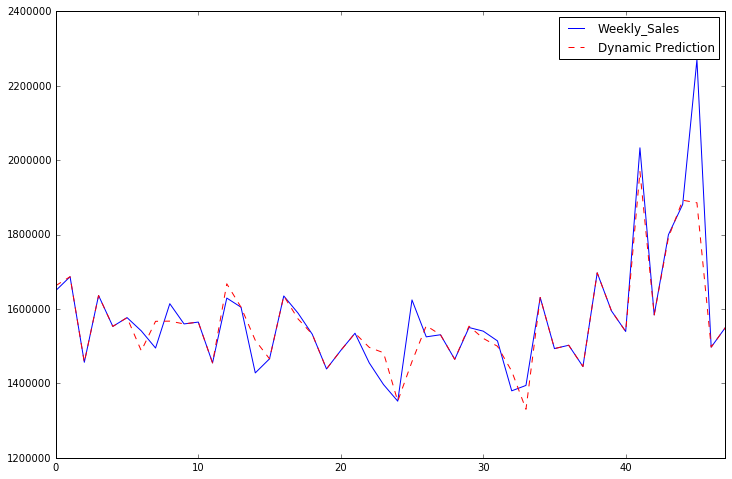

In [76]:
ax = ensemble12['Weekly_Sales'].plot(figsize=(12,8))
ax = ensemble12['GBM_Pred'].plot(ax=ax, style='r--', label='Dynamic Prediction')
ax.legend();

In [77]:
x=ensemble1.drop(['Weekly_Sales'],axis=1)
y=ensemble1.Weekly_Sales
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [78]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [79]:
params = {'n_estimators': 500, 'max_depth': 10}
clf = ensemble.GradientBoostingRegressor(**params)

In [80]:
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 8088136640.2603


In [81]:
clf.score(X_train, y_train)

1.0

In [82]:
clf.score(X_test, y_test)

0.97519735913296379

In [83]:
rmse(ensemble1.Exp_Smoothing,y)

702873.63480795489

In [84]:
rmse(ensemble1.ARIMAX,y)

167971.02054524771

In [85]:
rmse(ensemble1.GBM_Pred,y)

56913.026008314708

In [86]:
rmse(clf.predict(x),y)

56879.299012066775

In [87]:
rmse(clf.predict(x),y)

56879.299012066775

In [88]:
ensemble1['ensemble_pred']=clf.predict(x)

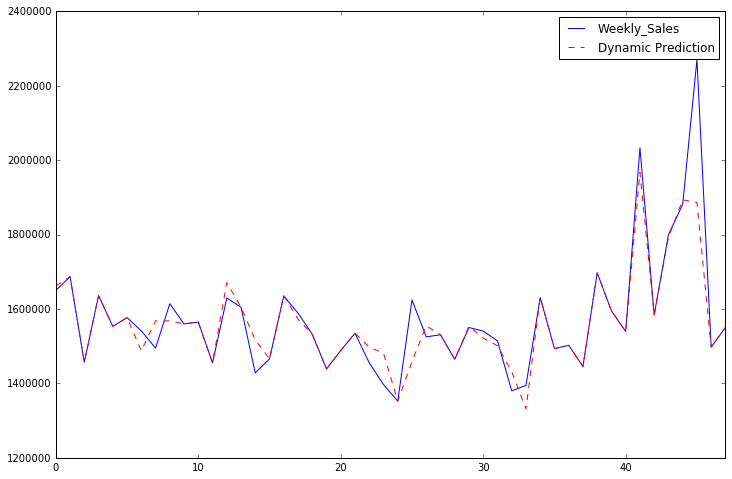

In [89]:
ax = ensemble12['Weekly_Sales'].plot(figsize=(12,8))
ax = ensemble1['ensemble_pred'].head(48).plot(ax=ax, style='r--', label='Dynamic Prediction')
ax.legend();

In [90]:
ensemble1.to_csv('ensemble.csv')

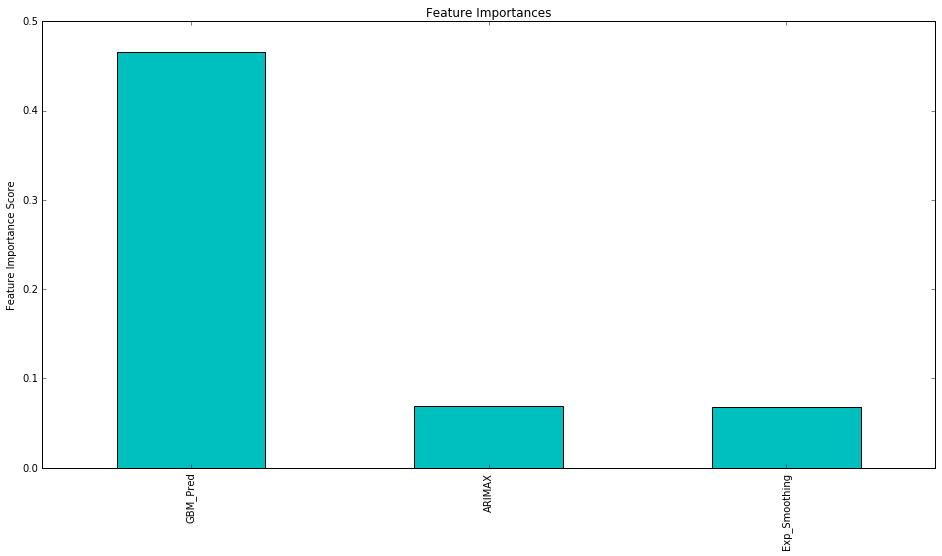

In [91]:
plt.figure(figsize=(16,8))
feat_imp = pd.Series(clf.feature_importances_, X_test.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',color='c')
plt.ylabel('Feature Importance Score')

# Model 4: GLM